In [1]:
import torch 
import numpy as np 
import os
import re 
import random 

import seaborn as sns
import matplotlib.pyplot as plt 

from transformers import AutoTokenizer
from torch.utils.data import Dataset 
from data import TranscriptDataset

/home/seanleishman/anaconda3/envs/diss/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
ts = TranscriptDataset(tokenizer=AutoTokenizer.from_pretrained('bert-base-uncased'),
                                                               overwrite=True)

  8%|████████████████▍                                                                                                                                                                                     | 162/1949 [00:05<01:02, 28.48it/s]


KeyboardInterrupt: 

/home/seanleishman/anaconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/seanleishman/anaconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

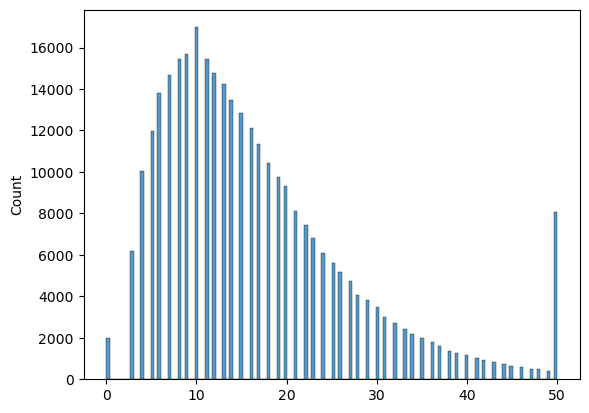

In [23]:
# Length of two context windows for input
sns.histplot(data=[len(t['input']['input_ids']) for t in ts])

In [39]:
def first_turn_token(t):
    idx = (ts[t]['output']['input_ids'] == 102).nonzero(as_tuple=True)[0]
    if len(idx) < 1:
        return -1 
    return idx[0].item()

/home/seanleishman/anaconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/seanleishman/anaconda3/envs/diss/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

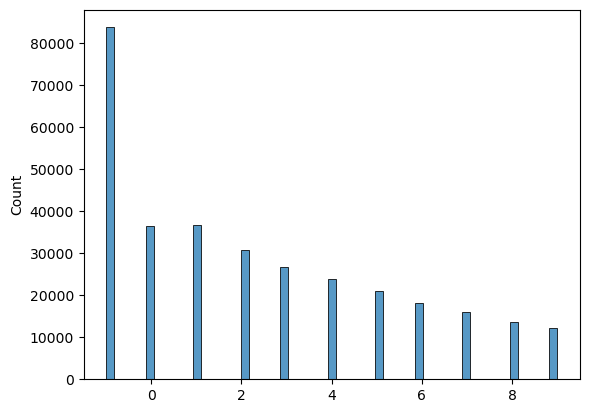

In [43]:
# Utterance length prior to turn shift in output (-1 does not occur in 10 tokens)
sns.histplot(data=[first_turn_token(t) for t in range(len(ts))])

In [2]:
ts = TranscriptDataset(tokenizer=AutoTokenizer.from_pretrained('bert-base-uncased'), overwrite=False, window_step=1) 

In [5]:
ts.generate_indexes()[:10], ts.prefix_sum[:10]

([0, 782, 1880, 3197, 4215, 5479, 6586, 7738, 8697, 9869],
 [0, 782, 1880, 3197, 4215, 5479, 6586, 7738, 8697, 9869])

In [6]:
# Verify input/output of __getitem__ 
for idx in range(0,1000):
    print(f"idxs:{ts.get_dialog_idx(idx)},{idx} input: {ts.tokenizer.decode(ts[idx]['input']['input_ids'])}, output: {ts.tokenizer.decode(ts[idx]['output']['input_ids'])}")

idxs:(0, 0),0 input: , output: [CLS] okay now then you heard the question what [SEP]
idxs:(0, 1),1 input: , output: okay now then you heard the question what [SEP] what
idxs:(0, 2),2 input: okay, output: now then you heard the question what [SEP] what do
idxs:(0, 3),3 input: okay now, output: then you heard the question what [SEP] what do you
idxs:(0, 4),4 input: okay now then, output: you heard the question what [SEP] what do you like
idxs:(0, 5),5 input: okay now then you, output: heard the question what [SEP] what do you like to
idxs:(0, 6),6 input: okay now then you heard, output: the question what [SEP] what do you like to do
idxs:(0, 7),7 input: okay now then you heard the, output: question what [SEP] what do you like to do for
idxs:(0, 8),8 input: okay now then you heard the question, output: what [SEP] what do you like to do for yourself
idxs:(0, 9),9 input: okay now then you heard the question what, output: [SEP] what do you like to do for yourself in
idxs:(0, 10),10 input: ok

idxs:(1, 165),947 input: or whatnot and [SEP] you know [SEP] next thing you know, output: [SEP] uh someone calls and [SEP] wants to sell you
idxs:(1, 166),948 input: you know [SEP] next thing you know [SEP], output: uh someone calls and [SEP] wants to sell you this
idxs:(1, 167),949 input: you know [SEP] next thing you know [SEP] uh, output: someone calls and [SEP] wants to sell you this or
idxs:(1, 168),950 input: you know [SEP] next thing you know [SEP] uh someone, output: calls and [SEP] wants to sell you this or that
idxs:(1, 169),951 input: you know [SEP] next thing you know [SEP] uh someone calls, output: and [SEP] wants to sell you this or that and
idxs:(1, 170),952 input: you know [SEP] next thing you know [SEP] uh someone calls and, output: [SEP] wants to sell you this or that and it
idxs:(1, 171),953 input: next thing you know [SEP] uh someone calls and [SEP], output: wants to sell you this or that and it '
idxs:(1, 172),954 input: next thing you know [SEP] uh someone calls a

In [15]:
ts[30]['input'], ts.tokenizer.decode(ts[30]['input']['input_ids'])

({'input_ids': tensor([ 2054,  2079,  2017,  2066,  2000,  2079,  2005,  4426,  1999,   102,
           2482,  9935, 10315,   102,  2092,  1045,  1005,  2222,  2425,  2017]),
  'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
 "what do you like to do for yourself in [SEP] car automobile repairs [SEP] well i'll tell you")